In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
file_input = "./Resources/nyc_jan_temps.csv"
nyc_df = pd.read_csv(file_input)
nyc_df

,New York (Central Park),New York,Average Temperature,January
0,Units: Degrees Fahrenheit,NaN,NaN,NaN
1,Base Period: 1990-2020,NaN,NaN,NaN
2,Missing: -99,NaN,NaN,NaN
3,Date,Value,Anomaly,NaN
4,189501,28.8,-5.1,NaN
...,...,...,...,...
127,201801,31.8,-2.1,NaN
128,201901,32.6,-1.3,NaN
129,202001,39.2,5.3,NaN
130,202101,34.8,0.9,NaN


In [32]:
nyc_df.columns

Index(['New York (Central Park)', ' New York', ' Average Temperature',
       ' January'],
      dtype='object')

In [33]:
nyc_df.dropna()
nyc_clean = nyc_df.rename(columns={"New York (Central Park)": "Year",
                       " New York": "Average Temperature",
                       " Average Temperature": "Anomaly"
                      })

In [34]:
nyc_clean

,Year,Average Temperature,Anomaly,January
0,Units: Degrees Fahrenheit,NaN,NaN,NaN
1,Base Period: 1990-2020,NaN,NaN,NaN
2,Missing: -99,NaN,NaN,NaN
3,Date,Value,Anomaly,NaN
4,189501,28.8,-5.1,NaN
...,...,...,...,...
127,201801,31.8,-2.1,NaN
128,201901,32.6,-1.3,NaN
129,202001,39.2,5.3,NaN
130,202101,34.8,0.9,NaN


In [35]:
nyc_clean = nyc_clean.drop([0,1,2,3])

In [36]:
nyc_clean

,Year,Average Temperature,Anomaly,January
4,189501,28.8,-5.1,NaN
5,189601,27.5,-6.4,NaN
6,189701,28.3,-5.6,NaN
7,189801,32.9,-1.0,NaN
8,189901,28.9,-5.0,NaN
...,...,...,...,...
127,201801,31.8,-2.1,NaN
128,201901,32.6,-1.3,NaN
129,202001,39.2,5.3,NaN
130,202101,34.8,0.9,NaN


In [37]:
del nyc_clean[" January"]

In [38]:
nyc_clean["Year"] = nyc_clean["Year"].str[:-2]

In [39]:
nyc_clean

,Year,Average Temperature,Anomaly
4,1895,28.8,-5.1
5,1896,27.5,-6.4
6,1897,28.3,-5.6
7,1898,32.9,-1.0
8,1899,28.9,-5.0
...,...,...,...
127,2018,31.8,-2.1
128,2019,32.6,-1.3
129,2020,39.2,5.3
130,2021,34.8,0.9


In [40]:
nyc_clean["Average Temperature"] = pd.to_numeric(nyc_clean["Average Temperature"])
nyc_clean["Year"] = pd.to_numeric(nyc_clean["Year"])
nyc_clean["Anomaly"] = pd.to_numeric(nyc_clean["Anomaly"])
nyc_clean = nyc_clean[nyc_clean["Year"]>1960]
nyc_clean

,Year,Average Temperature,Anomaly
70,1961,26.5,-7.4
71,1962,31.4,-2.5
72,1963,28.9,-5.0
73,1964,34.4,0.5
74,1965,28.5,-5.4
...,...,...,...
127,2018,31.8,-2.1
128,2019,32.6,-1.3
129,2020,39.2,5.3
130,2021,34.8,0.9


<IPython.core.display.Javascript object>


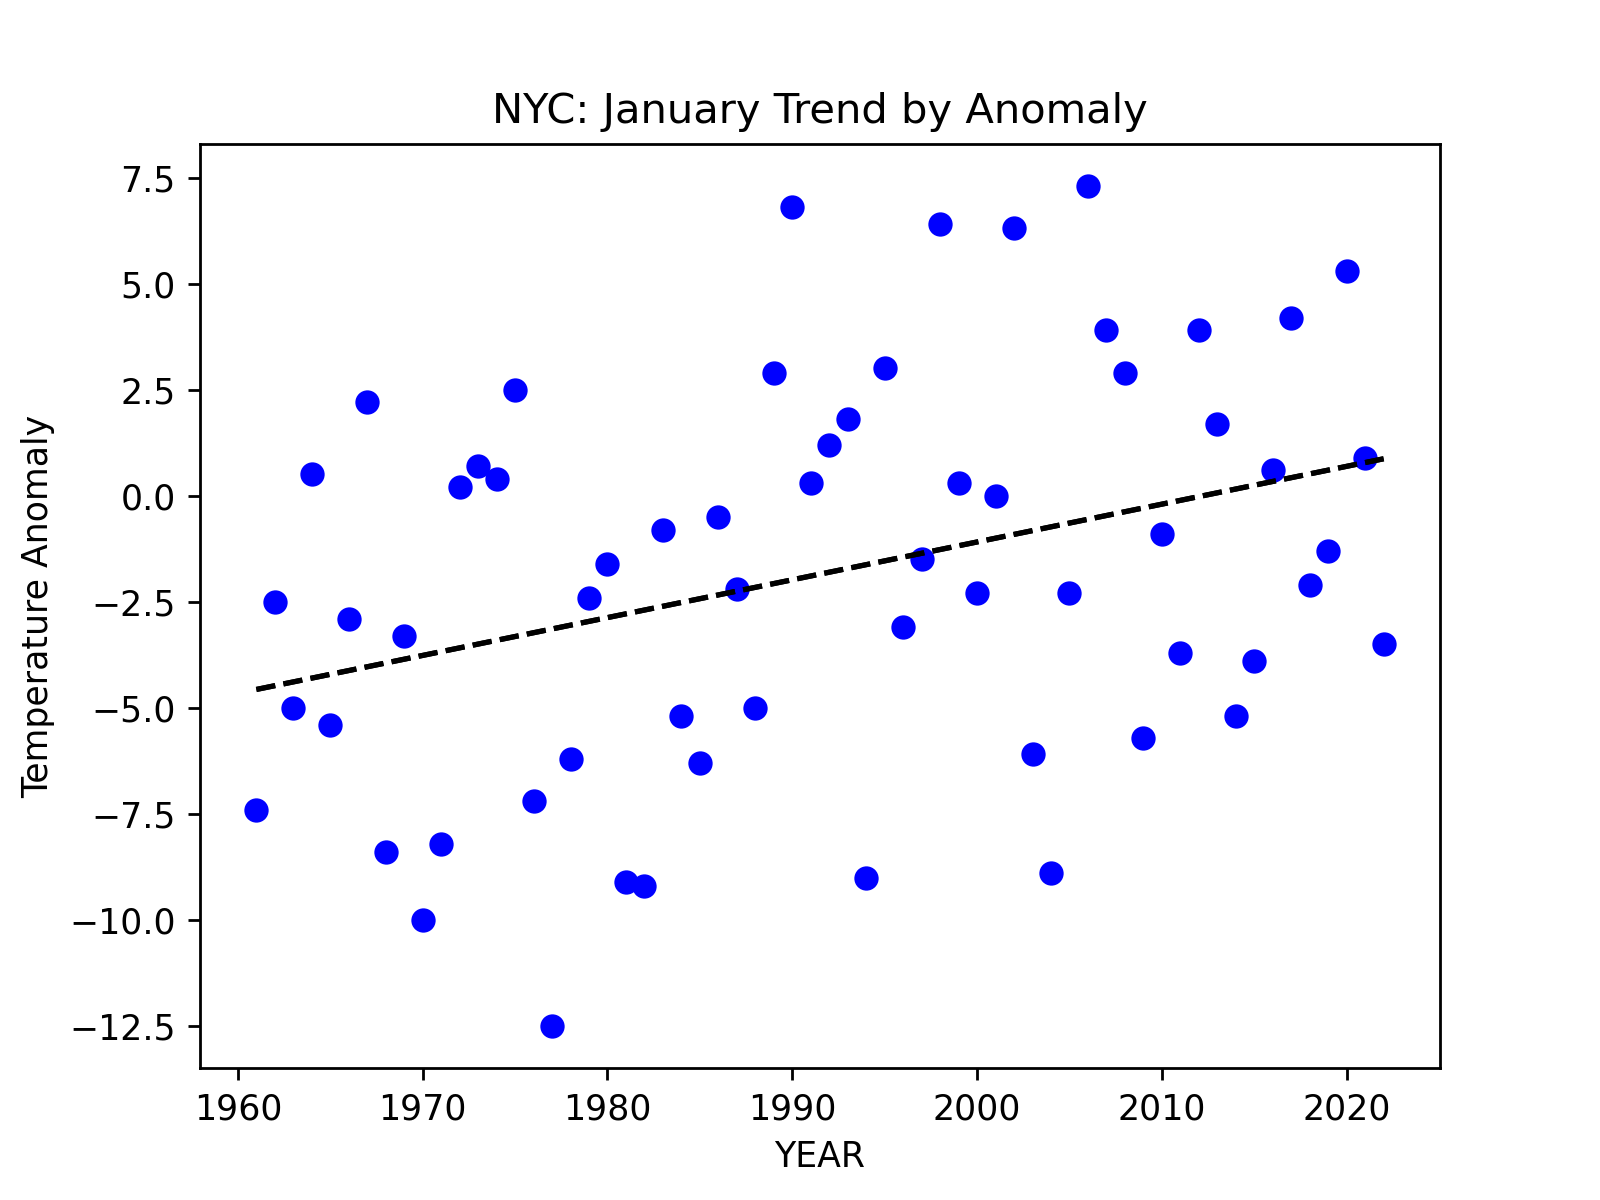

Text(0.5, 1.0, 'NYC: January Trend by Anomaly')

In [46]:
%matplotlib notebook

x_values = nyc_clean["Year"]
y_values = nyc_clean["Anomaly"]

plt.scatter(x_values, y_values, marker="o", facecolors = "blue")
plt.plot(x_values, y_fit, "--", color="black")
plt.xlabel("YEAR")
plt.ylabel("Temperature Anomaly")
plt.title("NYC: January Trend by Anomaly")




In [47]:
slope = stats.linregress(x_values,y_values)[0]
intercept = stats.linregress(x_values,y_values)[1]

y_fit = x_values * slope + intercept

plt.plot(x_values, y_fit, "--", color="black")
plt.show()
plt.savefig("./nyc_jan_temps2.png", transparent=True)